In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/drugsComTrain_raw_sentiment.csv', encoding= 'unicode_escape')

In [ ]:
data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positive
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,Negative
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,Negative
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,Positive
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,Negative
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,Positive


In [ ]:
data.shape

(161297, 8)

In [ ]:
data.isnull().any().any()

True

In [ ]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
 7   Sentiment    161297 non-null  object
dtypes: int64(3), object(5)
memory usage: 9.8+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
data_new = data[data['condition'].notnull()]

In [ ]:
data_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     160398 non-null  int64 
 1   drugName     160398 non-null  object
 2   condition    160398 non-null  object
 3   review       160398 non-null  object
 4   rating       160398 non-null  int64 
 5   date         160398 non-null  object
 6   usefulCount  160398 non-null  int64 
 7   Sentiment    160398 non-null  object
dtypes: int64(3), object(5)
memory usage: 11.0+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
data_new.isnull().any().any()

False

In [ ]:
!pip install vaderSentiment

In [ ]:
data_new['vader_score'] = data_new['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_new.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,vader_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positive,-0.2960
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positive,0.9174
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral,0.6160
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive,0.7184
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positive,0.9403
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,Negative,-0.4342
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,Negative,0.0000
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,Positive,-0.9089
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,Negative,-0.5593
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,Positive,-0.5593


In [ ]:
positive_num = len(data_new[data_new['vader_score']>= 0.05])
negative_num = len(data_new[data_new['vader_score']< 0.05])

In [ ]:
positive_num, negative_num

(77683, 82715)

In [ ]:
data_new['vader_sentiment_label'] = data_new['vader_score'].map(lambda x : int(1) if x>= 0.05 else int (0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_new.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,vader_score,vader_sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positive,-0.2960,0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positive,0.9174,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral,0.6160,1
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive,0.7184,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positive,0.9403,1


In [ ]:
positive_num = len(data_new[data_new['vader_score']>= 0.05])
neutral_num = len(data_new[(data_new['vader_score']> -0.05) & (data_new['vader_score'] < 0.05)])
negative_num = len(data_new[data_new['vader_score']< 0.05])

In [ ]:
positive_num, neutral_num, negative_num

(77683, 6393, 82715)

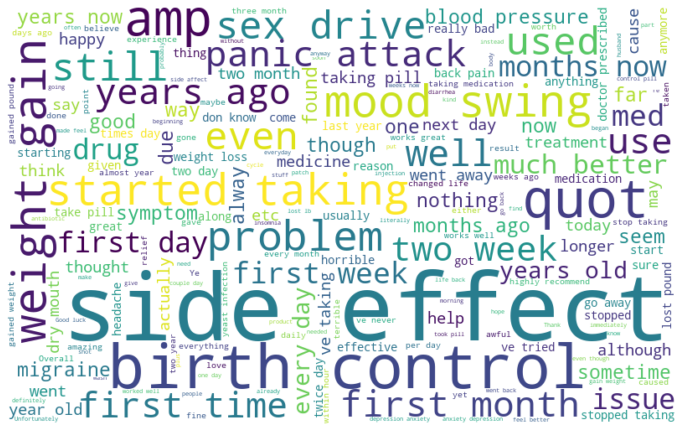

In [ ]:
all_words = ' '.join([text for text in data_new['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

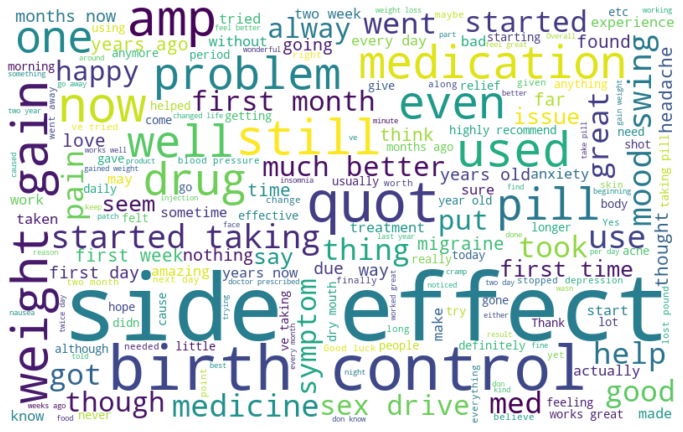

In [ ]:
normal_words = ' '.join([text for text in data_new['review'][data_new['vader_sentiment_label']== 1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

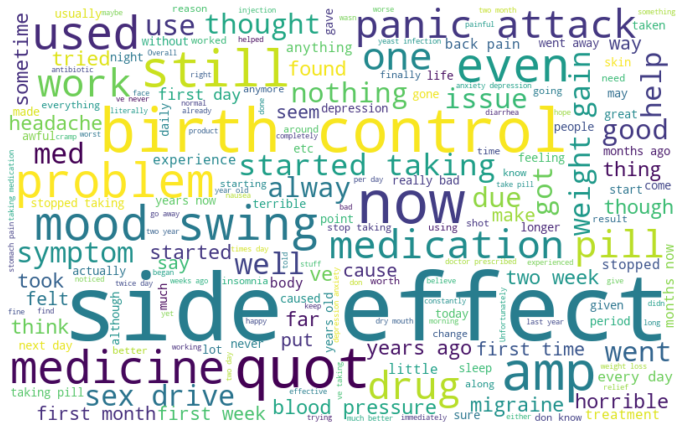

In [ ]:
normal_words = ' '.join([text for text in data_new['review'][data_new['vader_sentiment_label']== 0]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
data_new['date'] = pd.to_datetime(data['date']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#period = 100

#mean_df = data_new.groupby(['condition', 'date']).mean().unstack().xs('vader_score', axis = 'columns').transpose()
#mean_df = mean_df.iloc[-period:]
#mean_df.tail(100)

In [ ]:
#plt.figure(figsize = (15,8))

#plt.bar(mean_df.index,mean_df.LHR, label = 'LHR')
#plt.xlabel('Days over the past 100 days period')
#plt.ylabel('Sentiment intensity')
#plt.legend()

#lt.show()

In [ ]:
#plt.figure(figsize = (15,8))

#plt.bar(mean_df.index,mean_df.MAN, label = 'MAN')
#plt.title('Sentiment internsity chart')
#plt.xlabel('Days over the past 100 days period')
#plt.ylabel('Sentiment intensity')
#plt.legend()

#plt.show()

In [ ]:
#plt.figure(figsize = (15,8))

#plt.bar(mean_df.index,mean_df.MAN, label = 'MAN')
#plt.bar(mean_df.index,mean_df.LHR, label = 'LHR')
#plt.title('Sentiment internsity chart')
#plt.xlabel('Days over the past 100 days period')
#plt.ylabel('Sentiment intensity')
#plt.legend()

#plt.show()